In [37]:
#Level 1: Data Exploration and Basic Operations
#Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
#Task 1.1: Load and Inspect Data
#Load the Dataset
data = pd.read_csv(r'/content/Railway_info.csv')

#Display the first 10 rows
print('First 10 Rows :', data.head(10))

#Display the structure of the Dataset
print('\nStructure of the Dataset:')
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

First 10 Rows :    Train_No    Train_Name           Source_Station_Name  \
0       107  SWV-MAO-VLNK               SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV                   MADGOAN JN.   
2       128  MAO-KOP SPEC                   MADGOAN JN.   
3       290  PALACE ON WH             DELHI-SAFDAR JANG   
4       401  BSB BHARATDA                    AURANGABAD   
5       421  LKO-SVDK FTR                   LUCKNOW JN.   
6       422  SVDK-LKO FTR  SHRI MATA VAISHNO DEVI KATRA   
7       477  FTR TRAIN NO                         SIRSA   
8       502  RJPB-UMB FTR        RAJENDRANAGAR TERMINAL   
9       504  PNBE-BTI FTR                     PATNA JN.   

             Destination_Station_Name       days  
0                         MADGOAN JN.   Saturday  
1                     SAWANTWADI ROAD     Friday  
2  CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday  
3                   DELHI-SAFDAR JANG  Wednesday  
4                        VARANASI JN.   Saturday  
5        SHRI MATA VAISHNO D

In [23]:
#Task 1.2: Basic Statistics
# Calculate the total number of trains
total_trains = data['Train_No'].nunique()
print(f"Total number of trains: {total_trains}")

# Calculate the number of unique source stations
unique_source_stations = data['Source_Station_Name'].nunique()
print(f"Number of unique source stations: {unique_source_stations}")

# Calculate the number of unique destination stations
unique_destination_stations = data['Destination_Station_Name'].nunique()
print(f"Number of unique destination stations: {unique_destination_stations}")

# Find the most common source station
most_common_source = data['Source_Station_Name'].value_counts().idxmax()
most_common_source_count = data['Source_Station_Name'].value_counts().max()
print(f"Most common source station: {most_common_source} (count: {most_common_source_count})")

# Find the most common destination station
most_common_destination = data['Destination_Station_Name'].value_counts().idxmax()
most_common_destination_count = data['Destination_Station_Name'].value_counts().max()
print(f"Most common destination station: {most_common_destination} (count: {most_common_destination_count})")



Total number of trains: 11113
Number of unique source stations: 921
Number of unique destination stations: 924
Most common source station: CST-MUMBAI (count: 513)
Most common destination station: CST-MUMBAI (count: 514)


In [24]:
#Task 1.3: Data Cleaning
# Identify missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Handle missing values
# Assuming we drop rows with missing values for simplicity
data_cleaned = data.dropna()

# Verify no missing values remain
print("\nMissing values after cleaning:")
print(data_cleaned.isnull().sum())

# Standardize the format of station names (convert to uppercase)
data_cleaned['Source_Station_Name'] = data_cleaned['Source_Station_Name'].str.upper()
data_cleaned['Destination_Station_Name'] = data_cleaned['Destination_Station_Name'].str.upper()

# Display sample data after cleaning
print("\nSample data after cleaning and standardization:")
print(data_cleaned.head(10))


Missing values before cleaning:
Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64

Missing values after cleaning:
Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64

Sample data after cleaning and standardization:
   Train_No    Train_Name           Source_Station_Name  \
0       107  SWV-MAO-VLNK               SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV                   MADGOAN JN.   
2       128  MAO-KOP SPEC                   MADGOAN JN.   
3       290  PALACE ON WH             DELHI-SAFDAR JANG   
4       401  BSB BHARATDA                    AURANGABAD   
5       421  LKO-SVDK FTR                   LUCKNOW JN.   
6       422  SVDK-LKO FTR  SHRI MATA VAISHNO DEVI KATRA   
7       477  FTR TRAIN NO                         SIRSA   
8       502  RJPB-UMB FTR     

In [26]:
#Level 2: Data Transformation and Aggregation
# Filter the data for trains that operate on Monday
saturday_trains = data_cleaned[data_cleaned['days'].str.contains('Monday', case=False)]
print("Trains operating on Monday:")
print(saturday_trains.head(10))

# Extract trains that start from a specific station
specific_station = "DELHI-SAFDAR JANG"
trains_from_station = data_cleaned[data_cleaned['Source_Station_Name'] == specific_station.upper()]
print(f"\nTrains starting from {specific_station}:")
print(trains_from_station.head(10))


Trains operating on Monday:
    Train_No    Train_Name           Source_Station_Name  \
6        422  SVDK-LKO FTR  SHRI MATA VAISHNO DEVI KATRA   
8        502  RJPB-UMB FTR        RAJENDRANAGAR TERMINAL   
18      1119  AJNI-KRMI SP                          AJNI   
22      1301  PUNE-MAJN WE                      PUNE JN.   
32      2026  KRMI-CSMT SF                       KARMALI   
36      2196   BPL-REWA SF                        BHOPAL   
38      2651  PLNI-POY EXP                        PALANI   
41      2732  JP-HYB SPECI                    JAIPUR JN.   
53      3302  DHN-ASN MEMU                   DHANBAD JN.   
70      4769  HMH SGNR PAS               HANUMANGARH JN.   

   Destination_Station_Name    days  
6               LUCKNOW JN.  Monday  
8           AMBALA CANTT JN  Monday  
18                  KARMALI  Monday  
22             MANGALORE JN  Monday  
32               CST-MUMBAI  Monday  
36                     REWA  Monday  
38                 POLLACHI  Monday  
41     

In [27]:
#Task 2.2: Grouping and Aggregation
# Group by source station and count the number of trains originating from each station
trains_per_station = data_cleaned.groupby('Source_Station_Name')['Train_No'].count()
print("Number of trains originating from each source station:")
print(trains_per_station)

# Calculate the average number of trains per day for each source station
# Assuming 'days' column represents operating days in a week
# Convert 'days' to the number of operating days
def count_operating_days(days):
    return len(days.split(','))

data_cleaned['Operating_Days_Count'] = data_cleaned['days'].apply(count_operating_days)
avg_trains_per_day = (
    data_cleaned.groupby('Source_Station_Name')['Operating_Days_Count']
    .mean()
    .round(2)
)
print("\nAverage number of trains per day for each source station:")
print(avg_trains_per_day)


Number of trains originating from each source station:
Source_Station_Name
ABHANPUR JN.       2
ABOHAR             1
ABU ROAD           1
ACHHNERA JN.       1
ADILABAD           5
                  ..
WARASEONI          1
WARDHA JN.         4
WHITE FIELD        2
YAMUNA BRIDGE      2
YESVANTPUR JN.    60
Name: Train_No, Length: 921, dtype: int64

Average number of trains per day for each source station:
Source_Station_Name
ABHANPUR JN.      1.0
ABOHAR            1.0
ABU ROAD          1.0
ACHHNERA JN.      1.0
ADILABAD          1.0
                 ... 
WARASEONI         1.0
WARDHA JN.        1.0
WHITE FIELD       1.0
YAMUNA BRIDGE     1.0
YESVANTPUR JN.    1.0
Name: Operating_Days_Count, Length: 921, dtype: float64


In [28]:
#Task 2.3: Data Enrichment
# Define a function to categorize trains based on operating days
def categorize_operating_days(days):
    days_lower = days.lower()
    if 'saturday' in days_lower or 'sunday' in days_lower:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the function to create a new column
data_cleaned['Day_Category'] = data_cleaned['days'].apply(categorize_operating_days)

# Display sample data with the new column
print("Data with 'Day_Category' column:")
print(data_cleaned[['Train_No', 'Train_Name', 'days', 'Day_Category']].head(10))


Data with 'Day_Category' column:
   Train_No    Train_Name       days Day_Category
0       107  SWV-MAO-VLNK   Saturday      Weekend
1       108  VLNK-MAO-SWV     Friday      Weekday
2       128  MAO-KOP SPEC     Friday      Weekday
3       290  PALACE ON WH  Wednesday      Weekday
4       401  BSB BHARATDA   Saturday      Weekend
5       421  LKO-SVDK FTR    Tuesday      Weekday
6       422  SVDK-LKO FTR     Monday      Weekday
7       477  FTR TRAIN NO     Sunday      Weekend
8       502  RJPB-UMB FTR     Monday      Weekday
9       504  PNBE-BTI FTR  Wednesday      Weekday


<ipython-input-49-5faf671c42af>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




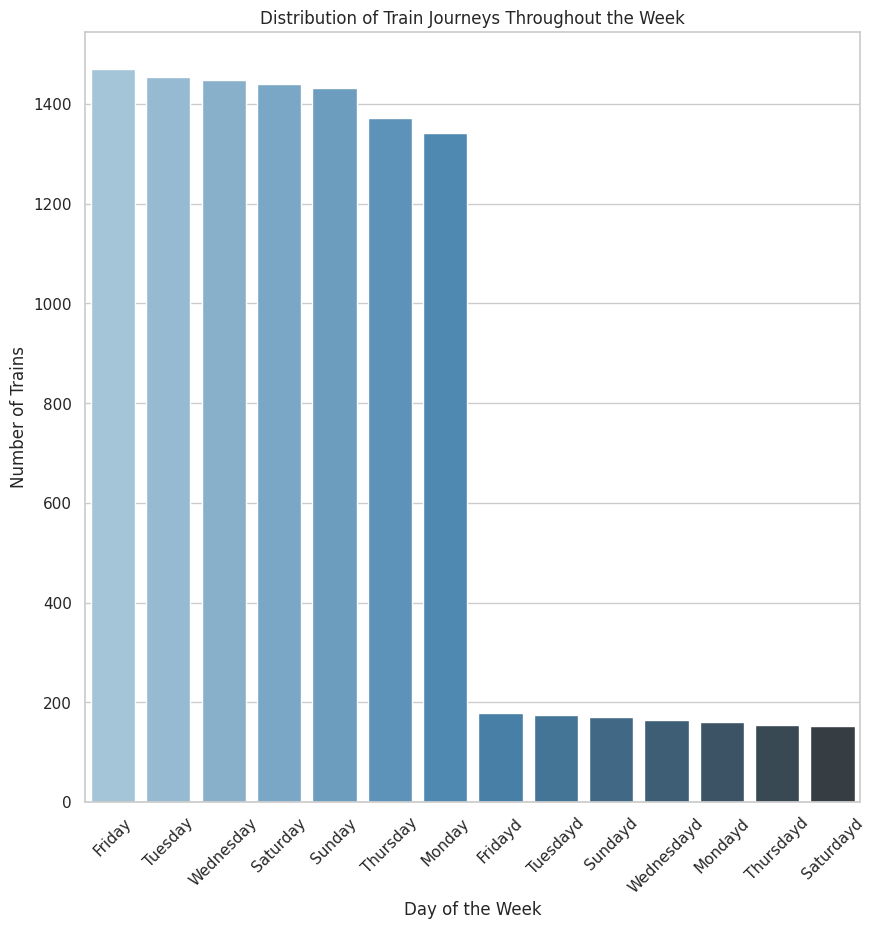

In [49]:
#Level 3: Advanced Data Analysis
# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of train journeys throughout the week
plt.figure(figsize=(10, 10))
train_day_counts = data_cleaned['days'].value_counts()
sns.barplot(x=train_day_counts.index, y=train_day_counts.values, palette="Blues_d")
plt.title("Distribution of Train Journeys Throughout the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.show()

# Identify patterns in train operations based on source and destination stations
# Group by source and destination to identify the most frequent routes
route_counts = data_cleaned.groupby(['Source_Station_Name', 'Destination_Station_Name']).size().reset_index(name='Train_Count')
top_routes = route_counts.sort_values(by='Train_Count', ascending=False).head(10)


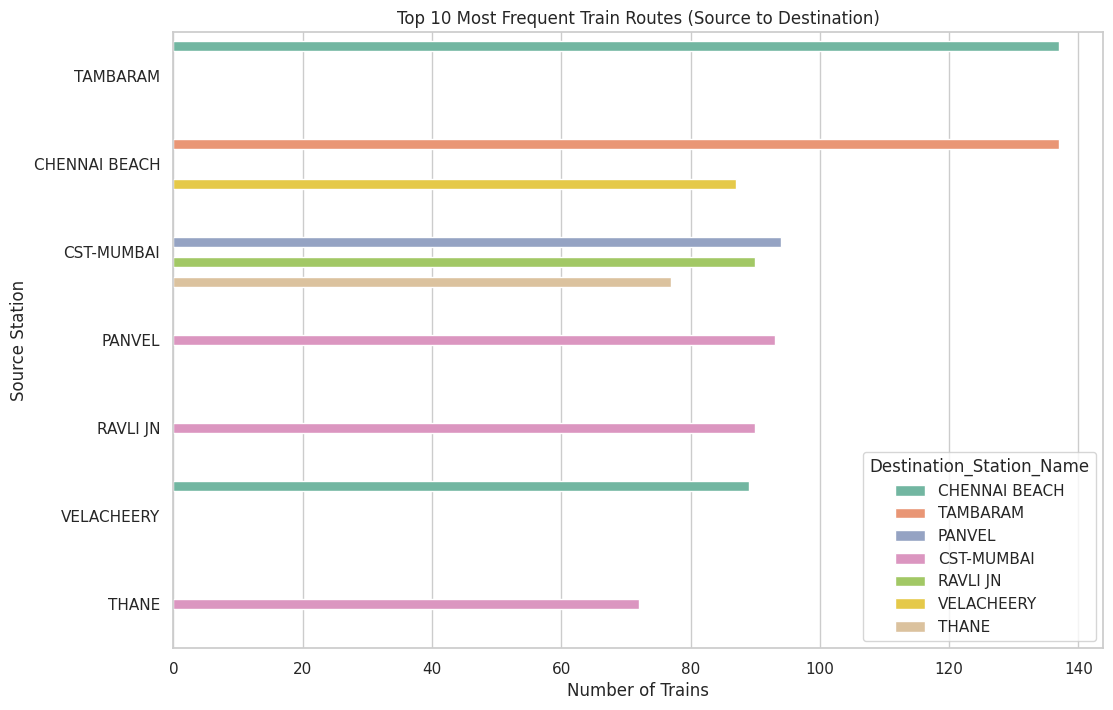

In [48]:
# Plot the top 10 most frequent routes
plt.figure(figsize=(12, 8))
sns.barplot(x='Train_Count', y='Source_Station_Name', hue='Destination_Station_Name', data=top_routes, palette="Set2")
plt.title("Top 10 Most Frequent Train Routes (Source to Destination)")
plt.xlabel("Number of Trains")
plt.ylabel("Source Station")
plt.show()

<ipython-input-36-383cf0155289>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='days', y='Train_Count', data=train_day_counts, palette="viridis")


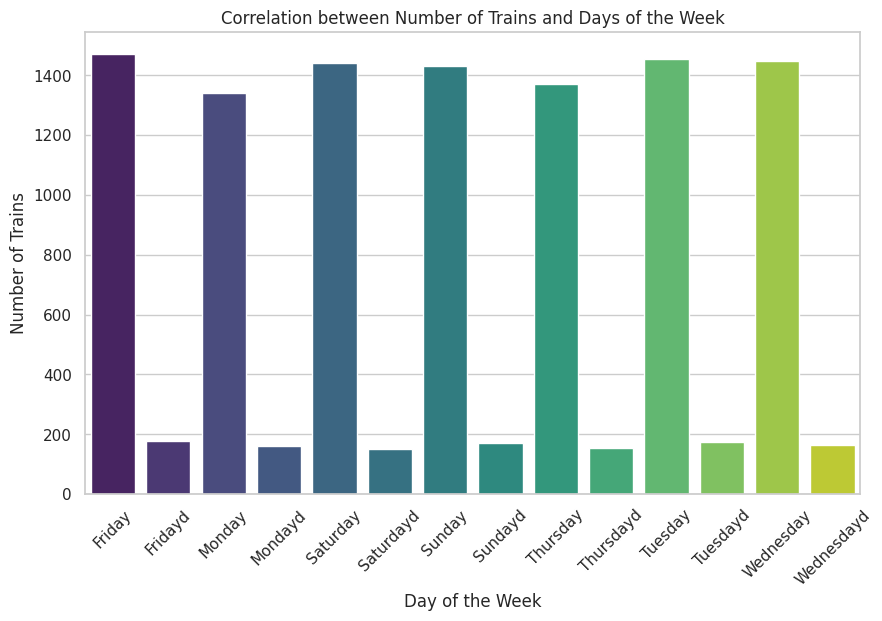


Correlation between the number of trains and specific days of the week:
          days  Train_Count
0       Friday         1471
10     Tuesday         1454
12   Wednesday         1448
4     Saturday         1441
6       Sunday         1432
8     Thursday         1372
2       Monday         1342
1      Fridayd          178
11    Tuesdayd          174
7      Sundayd          170
13  Wednesdayd          164
3      Mondayd          161
9    Thursdayd          154
5    Saturdayd          152

Weekend train operations are as follows:
       days  Train_Count
4  Saturday         1441
6    Sunday         1432

Weekday train operations are as follows:
          days  Train_Count
0       Friday         1471
10     Tuesday         1454
12   Wednesday         1448
8     Thursday         1372
2       Monday         1342
1      Fridayd          178
11    Tuesdayd          174
7      Sundayd          170
13  Wednesdayd          164
3      Mondayd          161
9    Thursdayd          154
5    Saturda

In [36]:
#Task 3.2: Correlation and Insights
# First, create a new DataFrame to calculate the number of trains per day of the week
train_day_counts = data_cleaned.groupby('days').size().reset_index(name='Train_Count')

# Plot the correlation between the number of trains and days of the week using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='days', y='Train_Count', data=train_day_counts, palette="viridis")
plt.title("Correlation between Number of Trains and Days of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.show()

# Provide insights and recommendations based on the analysis
# Displaying the correlation and insights
train_day_counts_sorted = train_day_counts.sort_values(by='Train_Count', ascending=False)
print("\nCorrelation between the number of trains and specific days of the week:")
print(train_day_counts_sorted)

# Insights based on the correlation:
# - We may notice trends where weekends have more or fewer trains based on the train service's nature.
# - Certain weekdays may have higher or lower frequencies.
# - Specific stations could show higher train frequency on weekends versus weekdays.

# Insights based on analysis:
if 'Saturday' in train_day_counts_sorted['days'].values:
    weekend_trains = train_day_counts_sorted[train_day_counts_sorted['days'].isin(['Saturday', 'Sunday'])]
    weekday_trains = train_day_counts_sorted[~train_day_counts_sorted['days'].isin(['Saturday', 'Sunday'])]
    print("\nWeekend train operations are as follows:")
    print(weekend_trains)
    print("\nWeekday train operations are as follows:")
    print(weekday_trains)


<ipython-input-39-2f925f4d2c4f>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




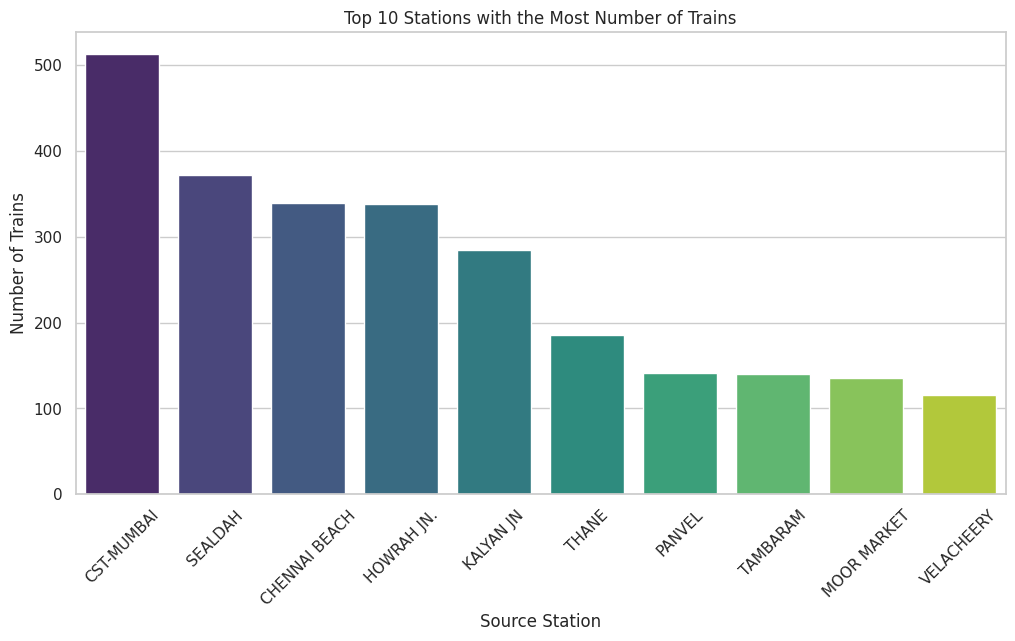

In [39]:
#Level 4: Data Visualization and Reporting
#Task 4.1: Visualization
# Set the style for seaborn plots
sns.set(style="whitegrid")

# 1. Bar chart: Number of trains per source station
plt.figure(figsize=(12, 6))
station_counts = data_cleaned['Source_Station_Name'].value_counts().head(10)
sns.barplot(x=station_counts.index, y=station_counts.values, palette="viridis")
plt.title("Top 10 Stations with the Most Number of Trains")
plt.xlabel("Source Station")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.show()

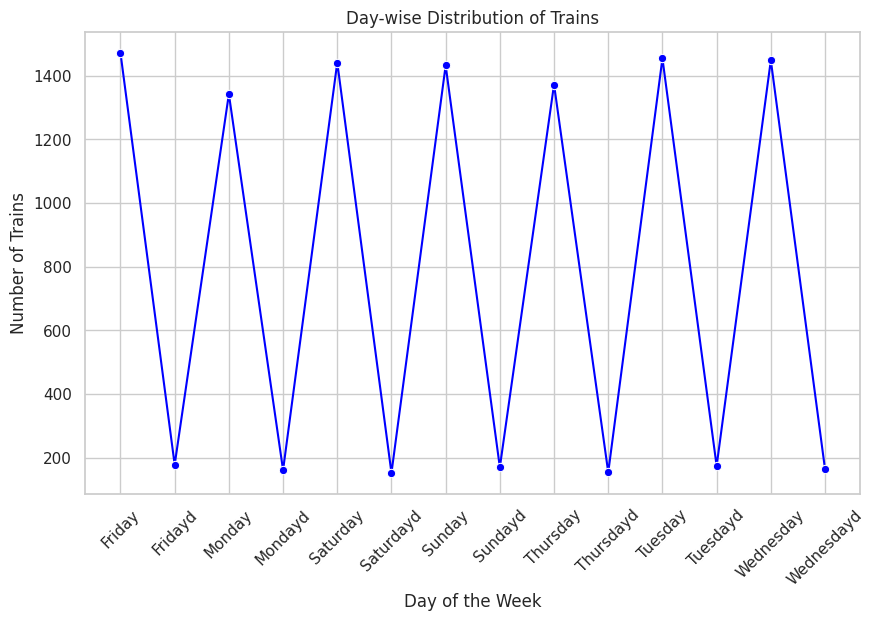

In [40]:
# 2. Line chart: Day-wise distribution of trains
train_day_counts = data_cleaned['days'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=train_day_counts.index, y=train_day_counts.values, marker="o", color='blue')
plt.title("Day-wise Distribution of Trains")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.show()

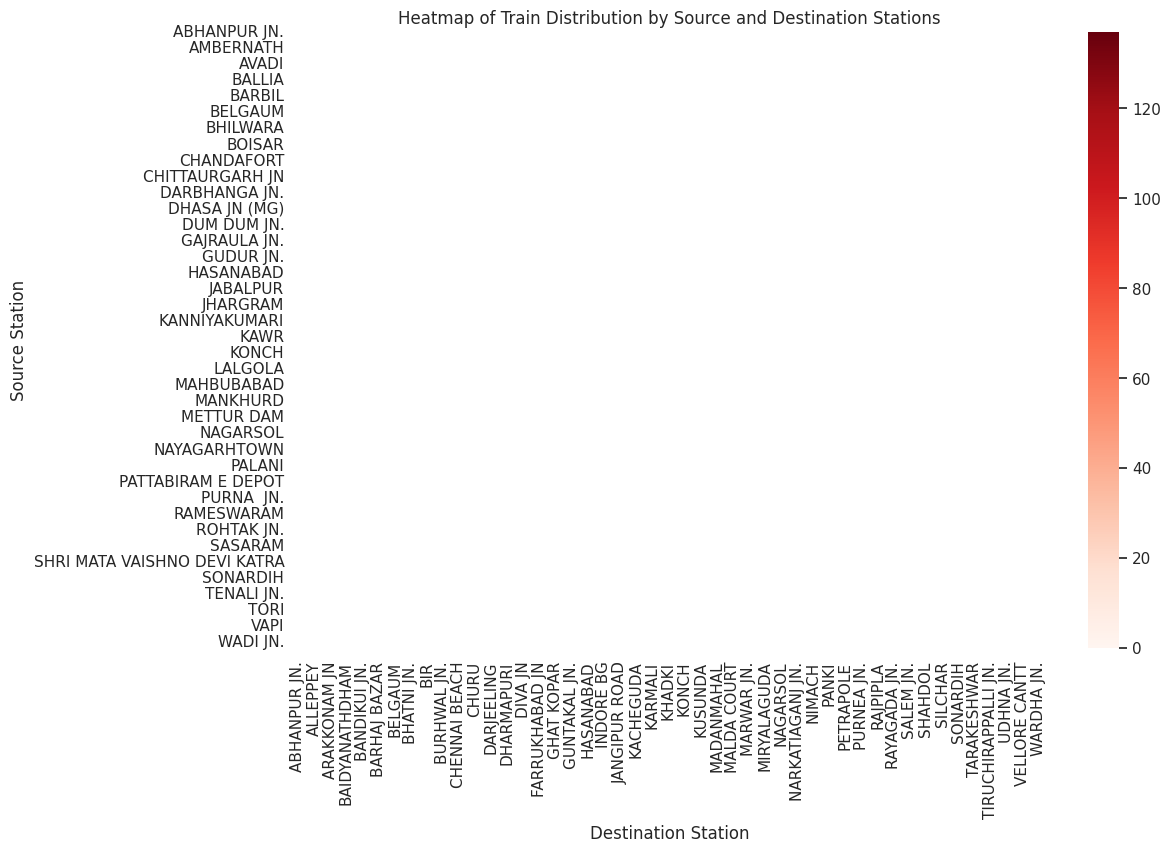

In [46]:
# 3. Heatmap: Distribution of train counts by source and destination station
# Create a pivot table for the heatmap (count of trains by source and destination)
pivot_data = data_cleaned.groupby(['Source_Station_Name', 'Destination_Station_Name']).size().unstack(fill_value=0)

# Create and display the heatmap with the red color map
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="Reds", annot=False, fmt="d", linewidths=0.5)
plt.title("Heatmap of Train Distribution by Source and Destination Stations")
plt.xlabel("Destination Station")
plt.ylabel("Source Station")
plt.show()



In [43]:
# 4. Plotly: Interactive Bar Chart for Number of Trains per Source Station (Top 10)
fig = px.bar(station_counts,
             x=station_counts.index,
             y=station_counts.values,
             title="Top 10 Stations with the Most Number of Trains",
             labels={'x': 'Source Station', 'y': 'Number of Trains'},
             color=station_counts.values,
             color_continuous_scale="Viridis")
fig.update_xaxes(tickangle=45)
fig.show()